### Exploratory data analysis

Nesse notebook fazemos as análises solicitadas e preparamos os gráficos para o dashboard.

* -Séries históricas:
Público elegível (pessoas e famílias) em cada mês e/ou outras informações que achar pertinente analisar em série histórica (vide comentário sobre dupla contagem a seguir).
* -Dados mais recentes da base:
pessoas e famílias por faixa de renda;
escolaridade das pessoas elegíveis e dos RFs (responsáveis familiares);
distribuição espacial das pessoas e famílias;
tamanho das famílias elegíveis;
bairros de maior concentração de pessoas e/ou famílias dentro do público elegível;
composição das famílias (se são chefiadas por uma mulher casada ou mãe solteira, homem casado ou pai solteiro etc.). 

In [1]:
import pandas as pd
import os
from config import DIR_DADOS_GERADOS

In [2]:
df = pd.read_csv(os.path.join(DIR_DADOS_GERADOS, 'base_final.csv'))

In [3]:
df.head()

,cod_familiar,data_nascimento,sexo,parentesco,escolaridade,referencia_dados,faixa_renda,bairro_oficial,cdregadm,cdbairro,regiao_administrativa,dtime_nascimento,idade,eligivel
0,X*HXV;+W,04/05/1967,feminino,Pessoa Responsável Familiar,Sem instrução,2024-01,"R$ 0 a R$600,00",VIANELO,S,425.0,Sul,1967-05-04,58,True
1,X*HXV;+W,29/05/2006,feminino,Neto(a) ou bisneto(a),Fundamental incompleto,2024-01,"R$ 0 a R$600,00",VIANELO,S,425.0,Sul,2006-05-29,19,True
2,X@;WXW?H,24/08/2006,feminino,Filho(a),Fundamental completo,2024-01,"R$601,00 a R%1.000,00",ELOY CHAVES,W,446.0,Oeste,2006-08-24,19,True
3,X@;WXW?H,16/03/1984,feminino,Pessoa Responsável Familiar,Médio incompleto,2024-01,"R$601,00 a R%1.000,00",ELOY CHAVES,W,446.0,Oeste,1984-03-16,41,True
4,**+@?*WXV,11/09/1992,feminino,Filho(a),Médio completo,2024-01,"R$ 0 a R$600,00",SANTA GERTRUDES,S,422.0,Sul,1992-09-11,33,True


Público elegível (pessoas e famílias) em cada mês

In [4]:
df['referencia_dados'].unique()

array(['2024-01', '2024-02', '2024-03', '2024-04', '2024-05', '2024-06',
       '2024-07', '2024-08', '2024-09', '2024-10', '2024-11', '2024-12'],
      dtype=object)

In [5]:
df['mes_referencia_dados'] = df['referencia_dados'].apply(lambda x: x.split('-')[1])

<Axes: title={'center': 'Percentual de pessoas elegíveis por mês'}, ylabel='mes_referencia_dados'>

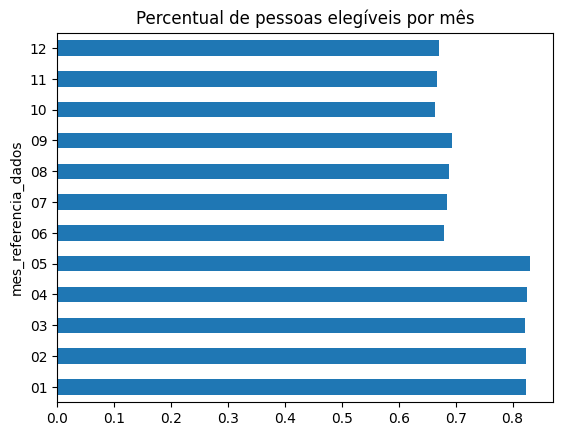

In [6]:
df.groupby('mes_referencia_dados')['eligivel'].mean().plot(kind='barh', title='Percentual de pessoas elegíveis por mês')

<Axes: title={'center': 'Total de pessoas elegíveis por mês'}, ylabel='mes_referencia_dados'>

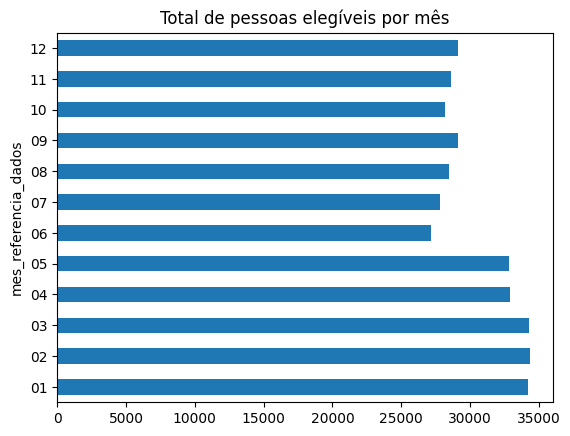

In [7]:
df.groupby('mes_referencia_dados')['eligivel'].sum().plot(kind='barh', title='Total de pessoas elegíveis por mês')

In [8]:
familias_eligiveis = df[['cod_familiar', 'eligivel', 'mes_referencia_dados']].drop_duplicates()

<Axes: title={'center': 'Total de famílias elegíveis por mês'}, ylabel='mes_referencia_dados'>

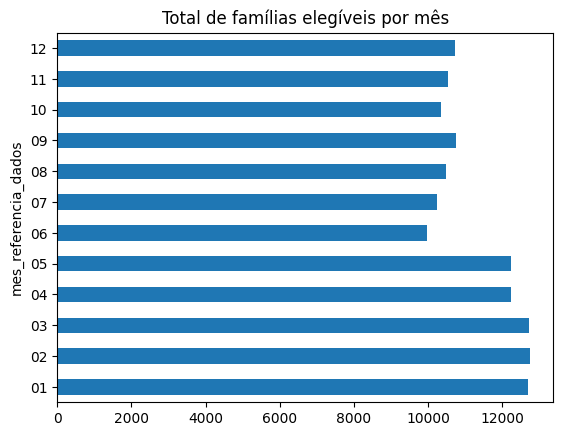

In [9]:
familias_eligiveis.groupby('mes_referencia_dados')['eligivel'].sum().plot(kind='barh', title='Total de famílias elegíveis por mês')

<Axes: title={'center': 'Percentual de famílias elegíveis por mês'}, ylabel='mes_referencia_dados'>

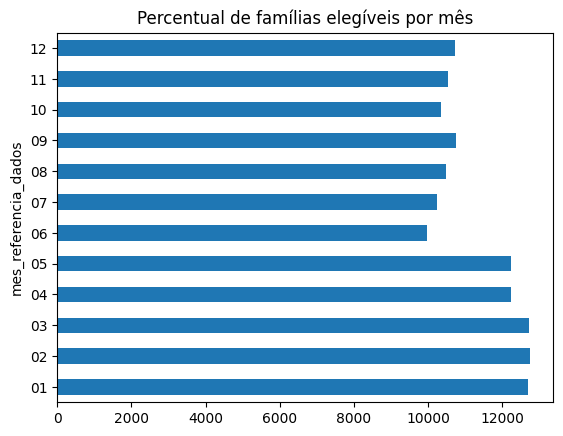

In [10]:
familias_eligiveis.groupby('mes_referencia_dados')['eligivel'].sum().plot(kind='barh', title='Percentual de famílias elegíveis por mês')

Pessoas e famílias por faixa de renda

In [15]:
df['qtd_pessoas'] = 1

<Axes: title={'center': 'Total de pessoas por faixa de renda'}, ylabel='faixa_renda'>

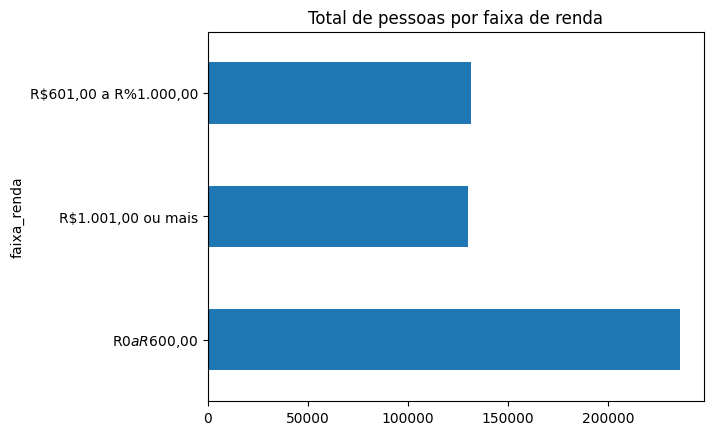

In [17]:
df.groupby('faixa_renda')['qtd_pessoas'].sum().plot(kind='barh', title='Total de pessoas por faixa de renda')

<Axes: title={'center': 'Percentual de pessoas por faixa de renda'}, ylabel='faixa_renda'>

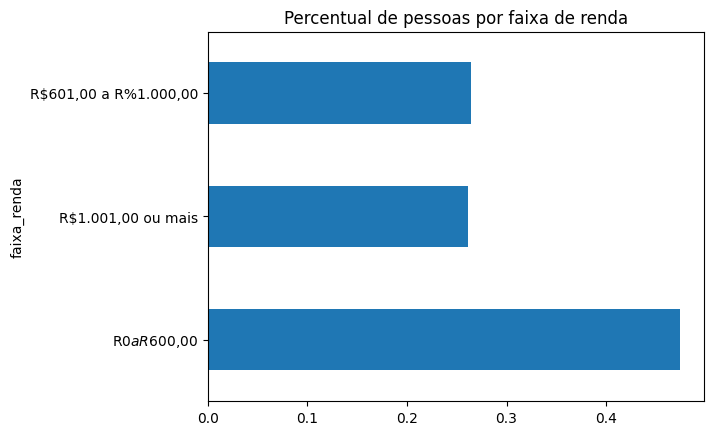

In [19]:
df.groupby('faixa_renda')['qtd_pessoas'].sum().apply(lambda x: x/df['qtd_pessoas'].sum()).plot(kind='barh', title='Percentual de pessoas por faixa de renda')

Vai ficar mais legal se fizermos as análises por mês no dashboard, permitindo selecionar o mês.

In [20]:
df.head()

,cod_familiar,data_nascimento,sexo,parentesco,escolaridade,referencia_dados,faixa_renda,bairro_oficial,cdregadm,cdbairro,regiao_administrativa,dtime_nascimento,idade,eligivel,mes_referencia_dados,count,qtd_pessoas
0,X*HXV;+W,04/05/1967,feminino,Pessoa Responsável Familiar,Sem instrução,2024-01,"R$ 0 a R$600,00",VIANELO,S,425.0,Sul,1967-05-04,58,True,01,1,1
1,X*HXV;+W,29/05/2006,feminino,Neto(a) ou bisneto(a),Fundamental incompleto,2024-01,"R$ 0 a R$600,00",VIANELO,S,425.0,Sul,2006-05-29,19,True,01,1,1
2,X@;WXW?H,24/08/2006,feminino,Filho(a),Fundamental completo,2024-01,"R$601,00 a R%1.000,00",ELOY CHAVES,W,446.0,Oeste,2006-08-24,19,True,01,1,1
3,X@;WXW?H,16/03/1984,feminino,Pessoa Responsável Familiar,Médio incompleto,2024-01,"R$601,00 a R%1.000,00",ELOY CHAVES,W,446.0,Oeste,1984-03-16,41,True,01,1,1
4,**+@?*WXV,11/09/1992,feminino,Filho(a),Médio completo,2024-01,"R$ 0 a R$600,00",SANTA GERTRUDES,S,422.0,Sul,1992-09-11,33,True,01,1,1


In [26]:
colunas_dash = [
    'cod_familiar',
    'sexo',
    'parentesco',
    'escolaridade',
    'faixa_renda',
    'idade',
    'mes_referencia_dados',
    'regiao_administrativa',
    'bairro_oficial',
    'cdbairro'
]

In [27]:
df[colunas_dash].head()

,cod_familiar,sexo,parentesco,escolaridade,faixa_renda,idade,mes_referencia_dados,regiao_administrativa,bairro_oficial,cdbairro
0,X*HXV;+W,feminino,Pessoa Responsável Familiar,Sem instrução,"R$ 0 a R$600,00",58,01,Sul,VIANELO,425.0
1,X*HXV;+W,feminino,Neto(a) ou bisneto(a),Fundamental incompleto,"R$ 0 a R$600,00",19,01,Sul,VIANELO,425.0
2,X@;WXW?H,feminino,Filho(a),Fundamental completo,"R$601,00 a R%1.000,00",19,01,Oeste,ELOY CHAVES,446.0
3,X@;WXW?H,feminino,Pessoa Responsável Familiar,Médio incompleto,"R$601,00 a R%1.000,00",41,01,Oeste,ELOY CHAVES,446.0
4,**+@?*WXV,feminino,Filho(a),Médio completo,"R$ 0 a R$600,00",33,01,Sul,SANTA GERTRUDES,422.0


In [28]:
df.to_parquet('base_final.parquet', index=False)